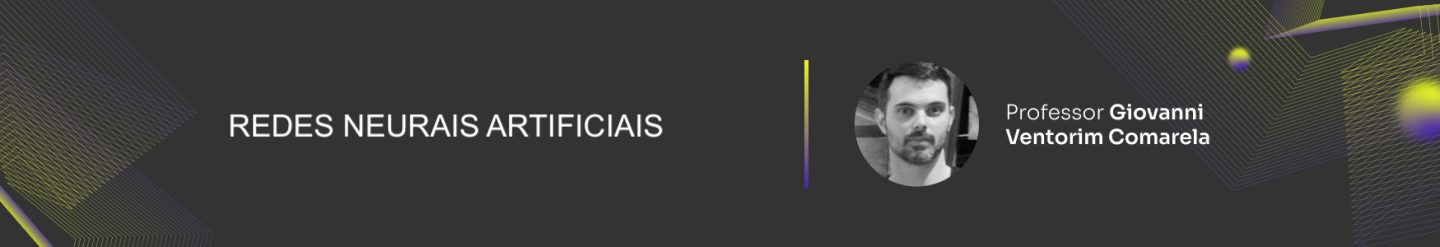

#Multilayer Perceptron - MLP

Na aula passada, nós vimos por meio de um exemplo que um único Perceptron não é capaz de resolver alguns problemas de reconhecimento de padrões com características **não lineares**, mesmo sendo problemas **simples**.

Nesta aula, no entanto, veremos que podemos combinar várias unidades Perceptron para obter um modelo maior, mais complexo e com capacidade de resolver modelos mais complicados.

**A ideia é simples!** Vamos encadear várias unidades Perceptron de forma que a saída de algumas unidades serão a entrada de outras (sem formar ciclos). Com isso, criaremos um modelo composto com expressividade maior do que a de uma única unidade.

Esses modelos compostos são chamados de *Multilayer Perceptron* (MLP), justamente porque estão organizados em várias camadas de unidades Perceptron.

Iniciaremos com MLPs mais simples e, posteriormente, veremos a generalização do conceito.

## MLP com uma camada oculta

A primeira versão de MLP que veremos consiste de uma MLP com apenas uma **camada oculta**. Mas o que isso significa?

A Figura abaixo ilustra o conceito.

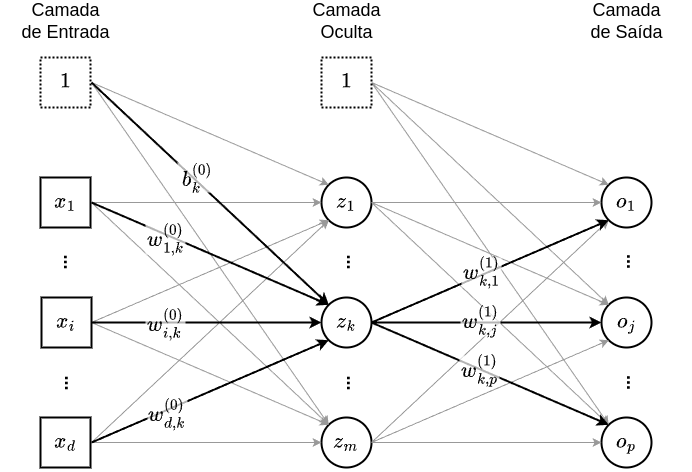

A Figura apresenta uma MLP com três camadas.

### Camada de Entrada

A **Primeira Camada** representa a **Camada de Entrada**. Essa a mesma Camada de Entrada utilizada em único Perceptron, onde o vetor de entrada $\mathbf{x} = [x_1, \dots, x_d]^T$ é fornecido ao modelo.

### Camada Oculta

A **Segunda Camada** é a **Camada Oculta**. Nessa camada, cada nó (Círculo) representa uma unidade de processamento de um Perceptron. Em outras palavras, em cada nó, é feita:
- A combinação linear dos elementos da entrada; e
- A aplicação de uma função de ativação.
Assim, para $k = 1, 2, \dots, m$:
$$
\begin{align}
z_k & = f(w_{1,k}^{(0)}x_1 + w_{2,k}^{(0)}x_2+\dots + w_{d,k}^{(0)}x_d + b_k^{(0)})\\
    & = f((\mathbf{w}_k^{(0)})^T\mathbf{x} + b_k^{(0)}),
\end{align}
$$
onde:
$f(\cdot)$ é uma função de ativação; e
$$
\mathbf{w}_k^{(0)} =
\begin{bmatrix}
  w_{1,k}^{(0)}\\
  w_{2,k}^{(0)}\\
  \vdots \\
  w_{d,k}^{(0)}
\end{bmatrix}
$$
é o vetor de pesos, indicando o peso de cada $x_i$ no cômputo de $z_k$.

Após o cálculo, o valor $z_k$ é passado como (parte da) entrada para os nós (i.e., unidades) da camada seguinte.


Os pesos utilizados para o cômputo dos $z_k$'s podem ser organizados em uma matriz, $\mathbf{W}^{(0)}$, cujas colunas são os $\mathbf{w}_k^{(0)}$'s, ou seja:
$$
\begin{align}
\mathbf{W}^{(0)} & =
\begin{bmatrix}
\mathbf{w}_1^{(0)} & \mathbf{w}_2^{(0)} & \dots & \mathbf{w}_m^{(0)}
\end{bmatrix} \\
& =
\begin{bmatrix}
w_{1,1}^{(0)} & w_{1,2}^{(0)} & \dots & w_{1,m}^{(0)}\\
w_{2,1}^{(0)} & w_{2,2}^{(0)} & \dots & w_{2,m}^{(0)}\\
\vdots & \vdots & \ddots & \vdots \\
w_{d,1}^{(0)} & w_{d,2}^{(0)} & \dots & w_{d,m}^{(0)}\\
\end{bmatrix}.
\end{align}
$$

Do mais, os valores dos vieses usados para o cômputo da camada oculta podem ser organizados em um vetor $\mathbf{b}^{(0)}$, dado por:
$$
\mathbf{b}^{(0)} =
\begin{bmatrix}
  b_1^{(0)}\\
  b_{2}^{(0)}\\
  \vdots \\
  b_{m}^{(0)}
\end{bmatrix}.
$$

O número de unidades da camada oculta (o valor de $m$, na Figura) e a função de ativação $f$ são **hiperparâmetros** do modelo. Ou seja, ambos devem ser informados pelo usuário (geralmente escolhidos utilizando algum procedimento de validação cruzada).

### Camada de Saída

Por fim, a **Terceira Camada** representa a **Camada de Saída**, ou seja, os valores que serão fornecidos pelo modelo dada uma entrada $\mathbf{x}$.
 De forma similar à Camada Oculta, nessa camada, cada nó também é uma unidade de processamento de um Perceptron. Logo, para $o_j$, $j = 1, 2, \dots, p$:
$$
\begin{align}
o_j & = g(w_{1,j}^{(1)}z_1 + w_{2,j}^{(1)}z_2+\dots + w_{m,j}^{(1)}z_m + b_j^{(1)})\\
    & = g((\mathbf{w}_j^{(1)})^T\mathbf{z} + b_k^{(1)}),
\end{align}
$$
onde:
$g(\cdot)$ é uma função de ativação (não necessariamente igual à função $f$); e
$$
\mathbf{w}_j^{(1)} =
\begin{bmatrix}
  w_{1,j}^{(1)}\\
  w_{2,j}^{(1)}\\
  \vdots \\
  w_{m,j}^{(1)}
\end{bmatrix}
$$
é o vetor de pesos, indicando o peso de cada $z_k$ no cômputo de $o_j$.

Assim como para a camada oculta, os pesos e os vieses utilizados para o cômputo da camada de saída podem ser organizados em uma matriz e um vetor. Essa matriz (pesos) e esse vetor (vieses) são denotados por $\mathbf{W}^{(1)}$ e $\mathbf{b}^{(1)}$, respectivamente.

O número de unidades da camada de saída depende da tarefa em para qual o modelo será utilizada. Por exemplo, um modelo para regressão simples ou classificação binária pode ter apenas uma unidade na camada de saída. Já um modelo para regressão multivariada ou classificação multi-classe pode necessitar de várias unidades nessa camada. Veremos exemplos ao longo dessa aula e do restante do curso.

## Exemplo de MLP com uma camada oculta



Para exemplificar o funcionamento e a utilidade de uma MLP com uma camada oculta, considere a MLP descrita na Figura abaixo.

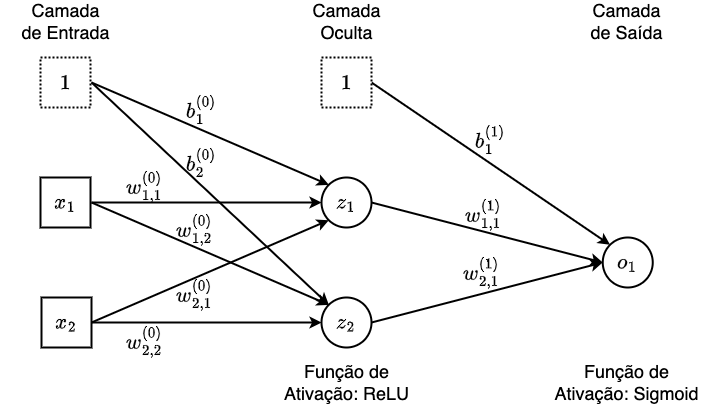

A MLP da Figura possui uma camada oculta com duas unidades e uma camada de saída com uma unidade.
Na camada oculta, a função de ativação ReLU (*Rectified Linear Unit* -- definida na aula passada) é utilizada. Já na camada de saída, utilizamos a função de ativação *Sigmoid* (também definida na aula passada).

Além da configuração acima, nesse exemplo, vamos definir também os valores das matrizes de pesos e dos vetores de vieses (i.e., os parâmetros da MLP) da seguinte maneira:

$$
\mathbf{W}^{(0)} =
\begin{bmatrix}
-1.722 &  1.162\\
1.722 & -1.161
\end{bmatrix},\
\mathbf{W}^{(1)} =
\begin{bmatrix}
-1.369\\
-1.820
\end{bmatrix},\
\mathbf{b}^{(0)} =
\begin{bmatrix}
-1.722 \\ -1.162
\end{bmatrix}\text{ e }
\mathbf{b}^{(1)} =
\begin{bmatrix}
1.691
\end{bmatrix}.
$$

Essa MLP mapeia $\mathbf{x} \in \mathbb{R}^2$ para um $y \in [0, 1]$. Vamos denotar esse mapeamento (ou função) por $\phi$, ou seja, dado um $\mathbf{x} \in \mathbb{R}^2$, a MLP em questão o mapeia para $\phi(\mathbf{x})$.

O Código abaixo apresenta a função, em Python, para calcular $\phi({\mathbf{x}})$ dados os parâmetros da rede.

In [ ]:
import numpy as np
import pandas as pd

# Matrizes W0 e W1
W0 = np.array([[-1.722,  1.162], [1.722 , -1.161]])
W1 = np.array([[-1.369], [-1.820]])

# Vetores b0 e b1
b0 = np.array([-1.722, -1.162])
b1 = np.array([1.691])

# entrada:
# - Vetor x
# - Parâmetros da MLP, W0, W1, b0, b1
def mlp_predict(x, W0, W1, b0, b1):
  z = (W0.T @ x + b0)       # Combinação linear da entrada e viés
  z = np.maximum(z, 0)      # ReLU
  o = W1.T @ z + b1         # Combinação linear das saídas da camada oculta
  o = 1 / (1 + np.exp(-o))  # Sigmoid
  return o[0]

Para ilustrar como essa MLP pode ser útil, considere o mesmo conjunto de dados utilizado na aula passada, referente a um problema de classificação. Há duas características (`x1` e `x2`) e duas classes (0 e 1).

In [ ]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame(
    [[2, 1, 1],
     [1, 2, 1],
     [3, 3, 1],
     [-2, -1, 1],
     [-1, -2, 1],
     [-3, -3, 1],
     [2, -1, 0],
     [1, -2, 0],
     [3, -3, 0],
     [-2, 1, 0],
     [-1, 2, 0],
     [-3, 3, 0]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,2,1,1
1,1,2,1
2,3,3,1
3,-2,-1,1
4,-1,-2,1
5,-3,-3,1
6,2,-1,0
7,1,-2,0
8,3,-3,0
9,-2,1,0


Os dados podem ser visualizados na Figura abaixo. Como mencionado na aula passada. Informalmente, esse problema de classificação é conhecido na literatura como XOR.

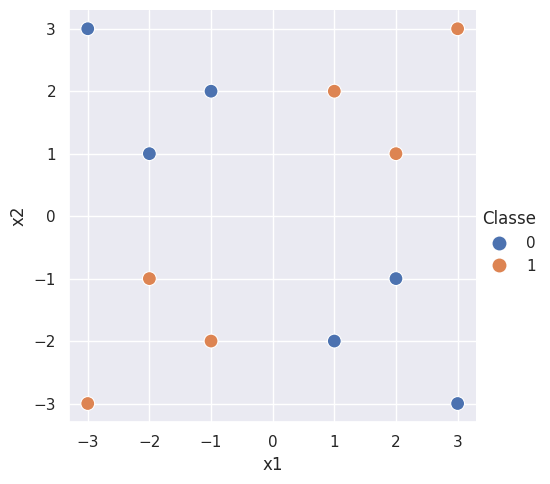

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

Vamos então utilizar a MLP para computar $\phi(\mathbf{x})$ para todos os elementos do conjunto de dados. Os resultados seguem abaixo.

In [ ]:
df['phi'] = df.apply(lambda x: mlp_predict(x[['x1', 'x2']].values, W0, W1, b0, b1), axis = 1)
df

,x1,x2,Classe,phi
0,2,1,1,0.844116
1,1,2,1,0.844356
2,3,3,1,0.844356
3,-2,-1,1,0.844356
4,-1,-2,1,0.844356
5,-3,-3,1,0.844356
6,2,-1,0,0.073314
7,1,-2,0,0.073438
8,3,-3,0,0.000139
9,-2,1,0,0.046361


Uma vez que a saída da rede é um número entre 0 e 1, pode-se (e é comum fazer isso) interpretar $\phi(\mathbf{x})$ como a chance ou probabilidade de $\mathbf{x}$ pertencer à Classe 1.
De fato, a possibilidade dessa interpretação é a motivação principal de se utilizar a *Sigmoid* como função de ativação na **Camada de Saída**.

Dessa forma, a MLP pode ser utilizada como um classificador. Para isso, dado $\mathbf{x} \in \mathbb{R}^2$, temos que:
$$
\text{Classe Predita de } \mathbf{x} =
\begin{cases}
1\text{, se } \phi(\mathbf{x}) > \frac{1}{2}\\
0\text{, caso contrário.}
\end{cases}
$$

O Código abaixo faz a predição das classes dos elementos do conjunto de dados conforme essa regra.

In [ ]:
df['Classe Predita'] = df.apply(lambda x: 1 if (mlp_predict(x[['x1', 'x2']].values, W0, W1, b0, b1) > 0.5) else 0, axis = 1)
df

,x1,x2,Classe,phi,Classe Predita
0,2,1,1,0.844116,1
1,1,2,1,0.844356,1
2,3,3,1,0.844356,1
3,-2,-1,1,0.844356,1
4,-1,-2,1,0.844356,1
5,-3,-3,1,0.844356,1
6,2,-1,0,0.073314,0
7,1,-2,0,0.073438,0
8,3,-3,0,0.000139,0
9,-2,1,0,0.046361,0


Veja que Interessante!

Tanto pelo conjunto de dados, quanto pela Figura abaixo, pode-se perceber que essa MLP consegue separar perfeitamente os elementos do conjunto dados de acordo com as classes a que pertencem.

Por que isso é interessante?

Na aula passada, vimos que um único Perceptron não conseguia fazer essa separação. No entanto, uma MLP pequena, que é basicamente a junção de três Perceptrons, consegue!

Esse exemplo apresenta uma das principais razões de MLPs serem tão importantes em Aprendizado de Máquina. Elas têm a capacidade de se adaptarem a problemas com características não lineares.

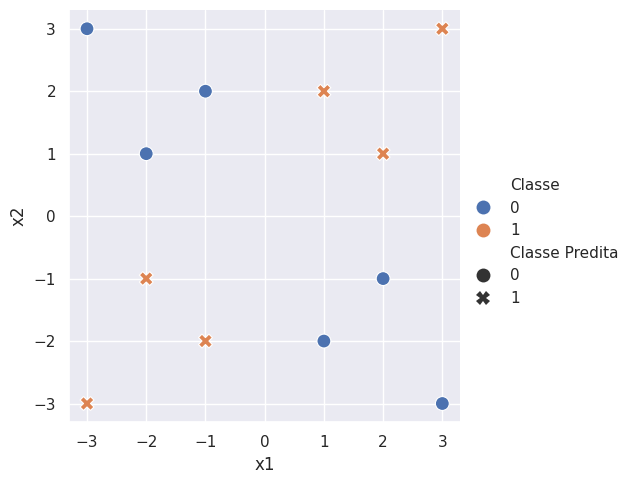

In [ ]:
#@title
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', style = 'Classe Predita', s = 100);

Para complementar o resultado acima, a Figura abaixo apresenta as regiões de decisão da MLP do exemplo.

Diferentemente do Perceptron da aula passada, essa MLP consegue estabelecer uma região (mais complexa que uma simples divisão linear) que divide o espaço de forma a classificar corretamente todos os pontos do conjunto de dados.

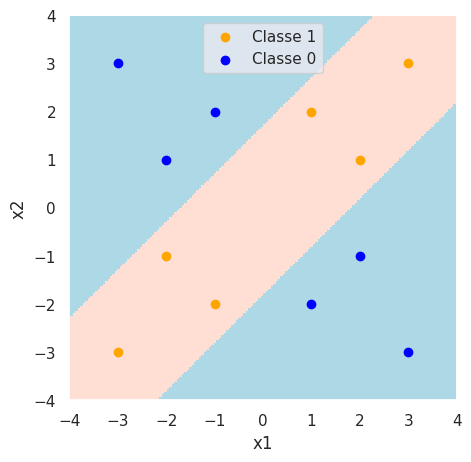

In [ ]:
#@title

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

h = .051
x_min, x_max = -4, 4
y_min, y_max = -4, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 1, figsize=(5, 5))

Z = pd.DataFrame(np.column_stack((xx.ravel(), yy.ravel())), columns = ['x1', 'x2'])
Z = Z.apply(lambda x: 1 if (mlp_predict(x[['x1', 'x2']].values, W0, W1, b0, b1) > 0.5) else 0, axis = 1).values
#Z = clf.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)
axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'orange', label = 'Classe 1')
axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'blue', label = 'Classe 0')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.legend(loc = 9);

Nesse momento, algumas perguntas relacionadas a esse exemplo podem aparecer naturalmente:
1. Como foram escolhidos os pesos da MLP?
2. Por que foi utilizada a função de ativação ReLU na camada oculta?
3. Por que foi utilizada a função de ativação *Sigmoid* na camada de saída?
4. Como o número de unidades na camada oculta foi definido?

A Pergunta (1) está relacionada ao processo de treinamento de uma Rede Neural. Começaremos a abordar esse assunto na próxima aula.

As Perguntas (2), (3) e (4) estão relacionadas à definição da **Arquitetura da Rede** e ao processo de escolha de hiperparâmetros. Geralmente, essas escolhas são feitas utilizando mecanismos de validação cruzada, assim como visto na disciplina de Classificação de Dados.

## MLP - Caso geral



A descrição de MLP e o exemplo dados anteriormente focam em redes com apenas uma Camada Oculta.

No caso geral, uma MLP pode ter diversas camadas ocultas, cada uma com um número específico de unidades e uma função de ativação.

A Figura abaixo apresenta uma generalização dos conceitos vistos até então.

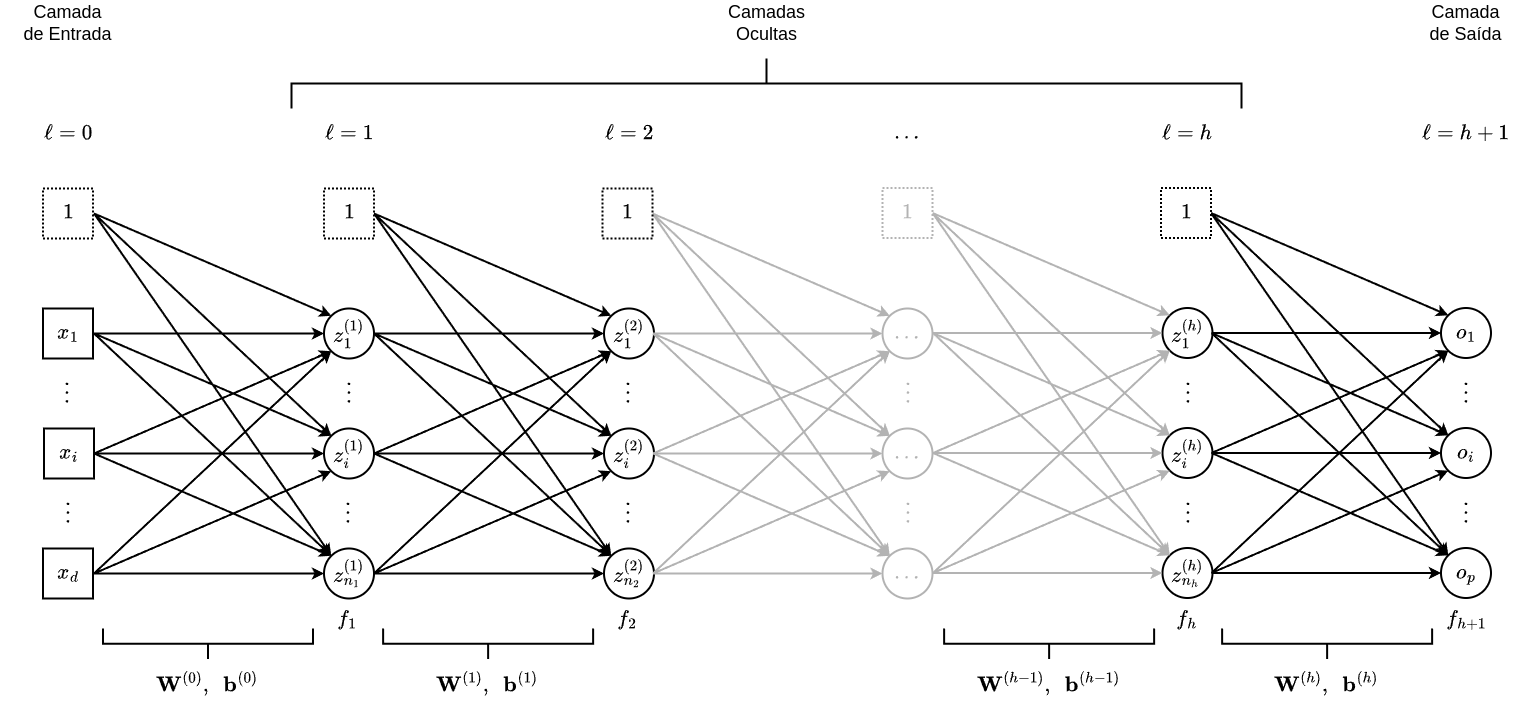

Assim, como nas MLPs que vimos até agora, essa MLP possui três tipos de camadas.

### Camada de Entrada

A **Primeira Camada** representa a **Camada de Entrada**. Essa a mesma cada de Entrada utilizada em único Perceptron ou em uma MLP com apenas uma camada oculta, onde o vetor de entrada $\mathbf{x} = [x_1, \dots, x_d]^T$ é fornecido ao modelo.

### Camadas Ocultas

Nessas camadas, cada nó (Círculo) representa uma unidade de processamento de um Perceptron. Em outras palavras, em cada nó, é feita:
- A combinação linear dos elementos da entrada (ou saída da camada oculta anterior); e
- A aplicação de uma função de ativação.

Assim, para a camada $\ell = 1, 2, \dots, h$ e para a $i$-ésima unidade dessa camada, tem-se que:
$$
z_i^{(\ell)} =
\begin{cases}
 f_\ell((\mathbf{w}_i^{(0)})^T\mathbf{x} + b_i^{(0)})\text{, se }\ell = 1\\
 f_\ell((\mathbf{w}_i^{(\ell-1)})^T\mathbf{z}^{(\ell-1)} + b_i^{(\ell - 1)})\text{, para } 2 \le \ell \le h.
\end{cases}
$$

onde:
- $f_\ell(\cdot)$ é uma função de ativação;

- $$
\mathbf{z}^{(\ell)} =
\begin{bmatrix}
  z_{1}^{(\ell)}\\
  z_{2}^{(\ell)}\\
  \vdots \\
  z_{n_\ell}^{(\ell)}
\end{bmatrix}
$$
é o vetor de saídas da camada $\ell$;

- $$
\mathbf{w}_i^{(0)} =
\begin{bmatrix}
  w_{1,i}^{(0)}\\
  w_{2,i}^{(0)}\\
  \vdots \\
  w_{d,i}^{(0)}
\end{bmatrix}
$$
é a coluna $i$ da matriz de pesos $\mathbf{W}^{(0)}$;

- $$
\mathbf{w}_i^{(\ell)} =
\begin{bmatrix}
  w_{1,i}^{(\ell)}\\
  w_{2,i}^{(\ell)}\\
  \vdots \\
  w_{n_\ell,i}^{(\ell)}
\end{bmatrix}
$$
é a coluna $i$ da matriz de pesos $\mathbf{W}^{(\ell)}$ ($1 \le \ell \le h$); e
- $$
\mathbf{b}^{(\ell)} =
\begin{bmatrix}
  b_1^{(\ell)}\\
  b_{2}^{(\ell)}\\
  \vdots \\
  b_{m}^{(\ell)}
\end{bmatrix}.
$$
é o vetor de vieses utilizados pelas unidades da camada $\ell+1$.

Após o cálculo, o valor $z_i$ é passado como (parte da) entrada para os nós (i.e., unidades) da camada seguinte.


### Camada de Saída

Por fim, a **Última Camada** representa a **Camada de Saída**, ou seja, os valores que serão fornecidos pelo modelo dada uma entrada $\mathbf{x}$.
 De forma similar às Camadas Ocultas, nessa camada, cada nó também é uma unidade de processamento de um Perceptron. Logo, para $o_i$, $i = 1, 2, \dots, p$:
$$
\begin{align}
o_i = f_{h+1}((\mathbf{w}_i^{(h)})^T\mathbf{z}^{(h)} + b_i^{(h)}),
\end{align}
$$
onde:

- $f_{h+1}(\cdot)$ é uma função de ativação;
- $$
\mathbf{z}^{(h)} =
\begin{bmatrix}
  z_{1}^{(h)}\\
  z_{2}^{(h)}\\
  \vdots \\
  z_{n_h}^{(h)}
\end{bmatrix}
$$
é o vetor de saídas da camada $h$, i.e., da última camada oculta;

- $$
\mathbf{w}_i^{(h)} =
\begin{bmatrix}
  w_{1,i}^{(h)}\\
  w_{2,i}^{(h)}\\
  \vdots \\
  w_{n_h,i}^{(h)}
\end{bmatrix}
$$
é a coluna $i$ da matriz de pesos $\mathbf{W}^{(h)}$; e

- $$
\mathbf{b}^{(h)} =
\begin{bmatrix}
  b_1^{(h)}\\
  b_{2}^{(h)}\\
  \vdots \\
  b_{m}^{(h)}
\end{bmatrix}.
$$
é o vetor de vieses utilizados pelas unidades da camada de saída.

Como no caso de uma MLP com apenas uma camada oculta,
o número de unidades da camada de saída depende da tarefa para qual o modelo será utilizada. Por exemplo, um modelo para regressão simples ou classificação binária pode ter apenas uma unidade na camada de saída. Já um modelo para regressão multivariada ou classificação multiclasse pode necessitar de várias unidades nessa camada.

Comumente, dado uma entrada $\mathbf{x} \in \mathbb{R}^d$, a saída de uma MLP, é denotada por $\phi({\mathbf{x}})$.

No caso geral, temos que $\phi({\mathbf{x}}) \in \mathbb{R}^p$.

Uma característica importante de uma MLP é que não existe retroalimentação entre as unidades de computação. Ou seja, não há ciclos em uma MLP. Na Figura acima, isso significa que a computação flui da esquerda para a direita até que uma resposta seja produzida na camada de saída. Redes Neurais com essa característica são chamadas de Redes *Feedforward*.

## Exemplos - Classificação de Dados

Para exemplificar a utilidade de MLPs em classificação, vamos utilizar o conjunto de dados de Reconhecimento de Dígitos, nosso conhecido da disciplina de Classificação de Dados.

Para relembrar, cada linha do conjunto de dados representa uma imagem. Cada coluna, representa a intensidade (em escala de cinza) de um dado píxel da imagem.

In [ ]:
from sklearn.datasets import load_digits

# carregando o conjunto de dados
X, y = load_digits(return_X_y = True, as_frame = True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


Como de costume, vamos começar com boas práticas de pré-processamento:
 - divisão do conjunto de dados em porções para treinamento e teste; e

 -padronização por reescala.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# ajustando o scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

A continuação desse exemplo será feita de duas formas diferentes. Primeiro, usaremos a biblioteca [`scikit-learn`](https://scikit-learn.org/stable/index.html). Depois, usaremos a biblioteca [`Keras`](https://keras.io/).

#### Na `scikit-learn`

Na biblioteca `scikit-learn`, podemos usar o módulo [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

O funcionamento é similar aos outros classificadores já estudados da biblioteca `scikit-learn`.

Nesse momento, não vamos os preocupar com os hiperparâmetros da rede (veremos isso em aulas futuras). No entanto, vale ressaltar que estamos utilizando uma MLP com duas camadas ocultas, cada uma com 100 unidades e cada unidade dessas camadas utilizando função de ativação ReLU.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Treinando o modelo
model = MLPClassifier(hidden_layer_sizes = (100, 100))
model.fit(X_train, y_train);

# Obtendo os rótulos do conjunto de teste de acordo com o modelo
y_pred = model.predict(X_test)

# Apresentando as métricas de avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.91      0.96      0.94        53
           2       0.97      0.97      0.97        59
           3       0.96      0.96      0.96        54
           4       0.98      1.00      0.99        60
           5       0.95      1.00      0.97        53
           6       1.00      1.00      1.00        50
           7       0.96      1.00      0.98        46
           8       0.96      0.90      0.93        50
           9       1.00      0.94      0.97        62

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### Em ``Keras``

`Keras` é uma biblioteca específica de Redes Neurais Artificiais e Aprendizado Profundo.

Ao longo dessa disciplina, também veremos exemplos em `Keras`, devido a sua flexibilidade de uso e popularidade nas comunidades de Ciência de Dados, Aprendizado de Máquina, Aprendizado Profundo e Inteligência Artificial.

**Observação:** Essa disciplina não tem a intenção de ser um tutorial de `Keras`. Interessados em aprender mais sobre a biblioteca devem consultar a documentação.

Por ser mais flexível, em `Keras`, precisamos fazer alguns passos a mais que na `scikit-learn` para treinar, utilizar e avaliar a rede. Para redes simples, esse trabalho "extra" pode parecer desnecessário, mas à medida que estudarmos mais conceitos relacionados a RNAs, veremos que ``Keras`` é uma biblioteca muito útil.

In [ ]:
from tensorflow import keras

Primeiro, por ser um problema de classificação com dez classes, é necessário codificar os rótulos utilizando *one-hot encoding*.

In [ ]:
encoder = keras.layers.CategoryEncoding(num_tokens = 10, output_mode="one_hot")
y_train_encoded = encoder(y_train)
y_train_encoded

<tf.Tensor: shape=(1257, 10), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

A seguir, é necessário definir o modelo. `Keras` permite configurar uma RNA como uma sequência de camadas.

A primeira camada é a camada de entrada.  No caso, como cada imagem é um vetor de tamanho 64, temos que a dimensão da entrada é 64.

A seguir, temos duas camadas com 100 unidades e função de ativação ReLU. Essas são as camadas ocultas do modelo. Em `Keras`, uma camada densa (`keras.layers.Dense`) indica que cada unidade da camada recebe a saída de todas as unidades da camada anterior.

Por fim, temos a camada de saída. Nesse caso, temos que definir a dimensão e a função de ativação. Por se tratar de classificação multiclasse, é boa prática utilizar o tamanho da camada de saída igual ao número de classes, no caso, 10.

Para a função de ativação da camada de saída, em problemas multiclasse, é comum utilizar a função *softmax*. Dado um vetor $\mathbf{net} \in \mathbb{R}^m$, tem-se
$$
\text{Softmax}(\mathbf{net})_i = \frac{e^{net_i}}{\sum_{j=1}^me^{net_j}}.
$$
Em resumo, quando utilizada na camada de saída, a função *softmax* "generaliza" a função *Sigmoid* para tarefas de classificação multiclasse. Ou seja, $\text{Softmax}(\mathbf{net})_i$ indica a chance (ou probabilidade) do rótulo $i$ ser a classe correta do elemento fornecido como entrada da rede.


In [ ]:
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((64,)),                              # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),  # camada oculta 1
    keras.layers.Dense(units = 100, activation = "relu"),   # camada oculta 2
    keras.layers.Dense(units = 10, activation = "softmax")] # camada de saída
)

O próximo passo é o treinamento. Nesse momento, há parâmetros sendo utilizados que ainda não foram definidos. Todos eles serão estudados em aulas futuras.

In [ ]:
model.compile(loss = "categorical_crossentropy")
model.fit(X_train, y_train_encoded, epochs = 200, verbose = 0); # treinamento

Após o treinamento, a rede pode ser utilizada. No código abaixo, utilizamos o modelo treinado no conjunto de teste.

Observe que a saída do modelo não são as classes preditas dos elementos do conjunto de teste, mas sim, as saídas da função *softmax*, referente à última camada da MLP. Ou seja, o método `predict` da biblioteca `Keras` retorna $\phi(\mathbf{x})$.

In [ ]:
phi = model.predict(X_test)
phi

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[2.05573780e-10, 2.08838548e-14, 9.79680240e-01, ...,
        1.38585365e-08, 1.99796576e-02, 6.01211858e-11],
       [2.71899942e-21, 7.47995134e-22, 1.11516475e-13, ...,
        1.10789714e-13, 9.50080943e-15, 1.18032956e-16],
       [4.59783678e-09, 4.03417921e-09, 7.48578560e-11, ...,
        4.18842137e-06, 9.51587260e-01, 4.19758435e-05],
       ...,
       [1.00000000e+00, 3.81308700e-13, 1.04231308e-16, ...,
        1.59745012e-11, 4.74157102e-10, 1.89009919e-11],
       [2.56690280e-10, 3.53225014e-17, 4.84616997e-17, ...,
        2.44303369e-25, 7.20875093e-08, 1.91981529e-23],
       [2.21083567e-20, 8.98583980e-19, 1.00000000e+00, ...,
        2.23036431e-17, 1.67129053e-14, 7.75289569e-20]], dtype=float32)

Para converter as probabilidades acima em classes (i.e., rótulos), é necessário identificar qual a posição do vetor (referente ao dígito equivalente) tem maior chance de ocorrência. Isso é feito no código abaixo com a função `argmax` da biblioteca `numpy`.

In [ ]:
y_pred = np.argmax(phi, axis = 1)
y_pred

array([2, 3, 8, 0, 9, 5, 7, 9, 4, 4, 7, 8, 3, 6, 2, 1, 4, 6, 2, 9, 2, 8,
       3, 6, 2, 9, 6, 3, 0, 9, 7, 3, 5, 5, 7, 6, 6, 9, 4, 9, 9, 0, 5, 1,
       5, 3, 7, 7, 9, 2, 1, 4, 0, 4, 7, 9, 4, 7, 2, 0, 3, 1, 0, 8, 4, 0,
       4, 2, 9, 7, 4, 5, 5, 7, 2, 6, 0, 2, 4, 0, 4, 9, 1, 6, 7, 6, 8, 5,
       6, 4, 2, 1, 0, 9, 3, 4, 1, 4, 0, 2, 1, 2, 3, 5, 5, 1, 7, 8, 5, 3,
       0, 6, 4, 7, 3, 4, 3, 9, 5, 6, 9, 4, 7, 3, 3, 4, 6, 3, 3, 5, 6, 0,
       3, 0, 7, 8, 1, 9, 7, 5, 9, 2, 1, 2, 4, 6, 4, 3, 8, 9, 3, 9, 2, 9,
       6, 5, 7, 8, 7, 6, 4, 7, 4, 8, 2, 5, 6, 0, 5, 1, 4, 5, 0, 3, 1, 3,
       8, 2, 4, 4, 4, 9, 2, 6, 5, 5, 1, 5, 1, 9, 1, 1, 5, 2, 7, 0, 5, 7,
       3, 4, 6, 9, 1, 2, 3, 2, 7, 9, 3, 1, 9, 8, 2, 5, 3, 9, 7, 1, 5, 6,
       4, 1, 2, 6, 5, 7, 1, 3, 3, 0, 3, 1, 0, 7, 4, 5, 5, 6, 0, 0, 9, 5,
       0, 4, 0, 4, 2, 7, 2, 3, 2, 3, 2, 5, 6, 1, 3, 2, 1, 6, 1, 9, 1, 4,
       8, 3, 1, 5, 8, 9, 8, 8, 8, 9, 6, 2, 2, 1, 2, 5, 5, 5, 4, 5, 9, 5,
       9, 0, 7, 5, 7, 7, 8, 9, 0, 1, 6, 8, 2, 6, 9,

Por fim, podemos apresentar as métricas de avaliação.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.91      0.96      0.94        53
           2       0.97      0.97      0.97        59
           3       1.00      0.96      0.98        54
           4       0.98      1.00      0.99        60
           5       0.98      1.00      0.99        53
           6       1.00      1.00      1.00        50
           7       0.96      1.00      0.98        46
           8       0.94      0.90      0.92        50
           9       1.00      0.97      0.98        62

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## Referências

- Machine Learning, Tom Mitchell, McGraw Hill, 1997.

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020.